# AirBnB Hotspots Final Code


## AirBnB Data Scrapes & Manipulation
* Extracted data for years 2015 thru 2018
* Imported & sorted to find Top 30 Zip Codes for each year 
* Merged 4 years together and concluded the final Top 30 Zip Codes 


In [3]:
# Paste code for importing csv/ finding final top 30 / merging top 30 from each year together

## External Resources
#####  Question: Does median household income affect prices?
* Census Python Package to identify Household Income


In [98]:
#Import Packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census

api_key = "9c43c55c9067920bded793b5c4d99ae0aba10281"

c = Census(api_key, year=2017)

In [99]:
# Run Census Search to retrieve data on selected zip codes
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E","B19301_001E"), 
                         {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Median Age", "Household Income",
                       "Per Capita Income"]]

# Visualize
print(len(census_pd))
census_pd.head()

33120


,Zipcode,Population,Median Age,Household Income,Per Capita Income
0,00601,17599.0,38.9,11757.0,7041.0
1,00602,39209.0,40.9,16190.0,8978.0
2,00603,50135.0,40.4,16645.0,10897.0
3,00606,6304.0,42.8,13387.0,5960.0
4,00610,27590.0,41.4,18741.0,9266.0


In [103]:
# Import Final zip codes data
zipcode_30 = pd.read_csv("../Final_Trending_Zipcodes.csv")

# Convert Zip Codes to str in order to extract from Census Data
zipcode_30['Zip Codes']=zipcode_30['Zip Codes'].astype(str)
zipcode_30.dtypes

Zip Codes        object
Borough          object
Neighborhood     object
Mean_2015       float64
Median_2015       int64
Mean_2016       float64
Median_2016       int64
Mean_2017       float64
Median_2017       int64
Mean_2018       float64
Median_2018     float64
dtype: object

In [104]:
# Create list of 30 codes that need to be searched
zips = zipcode_30.groupby('Zip Codes').count()
zips = zips.sort_values('Borough', ascending=False)

zip_list = list(zips.index.values)
zipcodes = zip_list[0:30]

# Extract zip codes data from Census dataframe
census_pd2 = census_pd[census_pd["Zipcode"].isin(zipcodes)]

# Merge Census data with trended data 
zipcode_30 = zipcode_30.rename(columns={'Zip Codes': 'Zipcode'})
census_pd2['Zipcode']=census_pd2['Zipcode'].astype(str)
zipsmerged = pd.merge(census_pd2, zipcode_30, on="Zipcode", how="outer")

# Add column totaling Medians and Means for all 4 years
zipsmerged['4year_Mean'] = (zipsmerged['Mean_2015'] + zipsmerged['Mean_2016'] + zipsmerged['Mean_2017'] + zipsmerged['Mean_2018']) / 4
zipsmerged['4year_Median'] = (zipsmerged['Median_2015'] + zipsmerged['Median_2016'] + zipsmerged['Median_2017'] + zipsmerged['Median_2018']) / 4

zipsmerged

C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,Zipcode,Population,Median Age,Household Income,Per Capita Income,Borough,Neighborhood,Mean_2015,Median_2015,Mean_2016,Median_2016,Mean_2017,Median_2017,Mean_2018,Median_2018,4year_Mean,4year_Median
0,10002,77925.0,41.8,35449.0,30677.0,Manhattan,Lower East Side,182.400477,150,168.815366,135,174.141667,129,171.128160,130.0,174.121417,136.000
1,10003,55035.0,32.6,104441.0,91141.0,Manhattan,Lower East Side,220.328891,180,218.895993,169,220.491229,160,223.038827,169.0,220.688735,169.500
2,10009,60141.0,36.8,60521.0,47782.0,Manhattan,Lower East Side,177.778549,150,165.071030,135,166.544186,135,170.691880,140.0,170.021411,140.000
3,10011,50711.0,39.8,123208.0,114218.0,Manhattan,Chelsea and Clinton,242.854346,200,225.796277,199,225.691729,195,235.382632,190.0,232.431246,196.000
4,10012,24527.0,34.5,104561.0,85491.0,Manhattan,Greenwich Village and Soho,255.219760,200,230.587597,190,224.176746,185,226.860020,185.0,234.211031,190.000
5,10014,31794.0,36.8,127973.0,122098.0,Manhattan,Greenwich Village and Soho,252.500823,210,239.303179,200,244.652423,200,256.992884,200.0,248.362327,202.500
6,10016,51448.0,33.3,109250.0,88762.0,Manhattan,Gramercy Park and Murray Hill,237.572914,185,214.245595,175,215.009782,170,219.999161,175.0,221.706863,176.250
7,10019,41592.0,39.6,99063.0,94797.0,Manhattan,Chelsea and Clinton,229.525049,189,215.508512,175,215.059272,170,228.574660,180.0,222.166874,178.500
8,10023,61514.0,42.6,123951.0,114641.0,Manhattan,Upper West Side,234.262821,190,223.957771,180,219.792201,182,219.262169,180.0,224.318740,183.000
9,10024,58512.0,43.1,126107.0,113584.0,Manhattan,Upper West Side,205.716110,175,199.247779,165,0.000000,0,195.559349,159.0,150.130809,124.750


In [110]:
zipsmerged.to_csv('ZipsCensus_Merged.csv', index=False)

In [106]:
# Build DF for linegraph of all zip codes & total mean
totals = zipsmerged[['Zipcode', 'Neighborhood', 'Household Income', '4year_Mean', '4year_Median']]

# Convert values to int
totals['Zipcode']=totals['Zipcode'].astype(int)
totals['4year_Mean']=totals['4year_Mean'].astype(int)
totals['4year_Median']=totals['4year_Median'].astype(int)
totals['Household Income']=totals['Household Income'].astype(int)

# Sort Zipcodes
means = totals.sort_values('4year_Mean', ascending=True)
means


C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\amand\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

,Zipcode,Neighborhood,Household Income,4year_Mean,4year_Median
24,11225,Flatbush,51926,72,60
26,11233,Central Brooklyn,36009,76,63
27,11237,Bushwick and Williamsburg,51269,84,68
25,11226,Flatbush,48495,86,70
22,11221,Bushwick and Williamsburg,47170,90,70
17,11206,Bushwick and Williamsburg,34122,97,76
13,10031,Inwood and Washington Heights,44040,99,76
20,11216,Central Brooklyn,56025,109,86
15,11201,Northwest Brooklyn,116446,130,112
11,10027,Central Harlem,45536,130,102


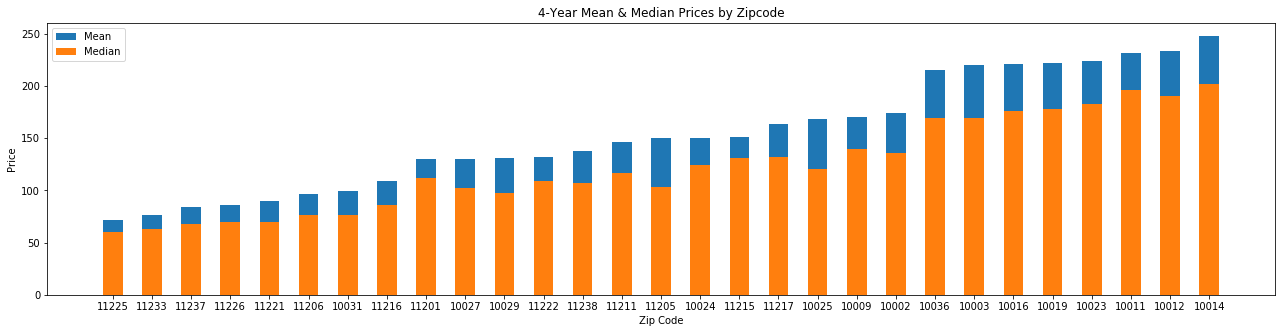

In [107]:
# Plot Mean and Median
plt.figure(figsize = (22,5));
x_axis = np.arange(len(means['Zipcode']));
tick_locations = [x for x in x_axis];
plt.xticks(tick_locations, means['Zipcode']);
plt.bar(x_axis, means['4year_Mean'], label ='Mean',width = 0.5);
plt.bar(x_axis, means['4year_Median'], label = 'Median',width = 0.5);
plt.legend(loc='best');
plt.xlabel('Zip Code');
plt.ylabel('Price');
plt.title('4-Year Mean & Median Prices by Zipcode');

In [108]:
# Groupby Neighborhood to higher level analysis
neighborhoods = totals.groupby('Neighborhood').count()
neighborhoods

,Zipcode,Household Income,4year_Mean,4year_Median
Neighborhood,,,,
Bushwick and Williamsburg,3,3,3,3
Central Brooklyn,3,3,3,3
Central Harlem,1,1,1,1
Chelsea and Clinton,3,3,3,3
East Harlem,1,1,1,1
Flatbush,2,2,2,2
Gramercy Park and Murray Hill,1,1,1,1
Greenpoint,2,2,2,2
Greenwich Village and Soho,2,2,2,2


In [19]:
# Sort by Median and grab top 10
zips_mean = zipsmerged.sort_values('4year_Mean', ascending=False)
zips_mean = zips_mean[['Zipcode', 'Household Income', 'Neighborhood','4year_Mean']]
zips_mean.head(10)

,Zipcode,Household Income,Neighborhood,4year_Mean
5,10014,127973.0,Greenwich Village and Soho,248.362327
4,10012,104561.0,Greenwich Village and Soho,234.211031
3,10011,123208.0,Chelsea and Clinton,232.431246
8,10023,123951.0,Upper West Side,224.318740
7,10019,99063.0,Chelsea and Clinton,222.166874
6,10016,109250.0,Gramercy Park and Murray Hill,221.706863
1,10003,104441.0,Lower East Side,220.688735
14,10036,93707.0,Chelsea and Clinton,215.111474
0,10002,35449.0,Lower East Side,174.121417
2,10009,60521.0,Lower East Side,170.021411


In [ ]:
# Build variables for line graph of Means